In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import pathlib

In [2]:
df_17 = pd.read_csv('../data/lpz_2016_2017/processed/labels.csv')

<BarContainer object of 29 artists>

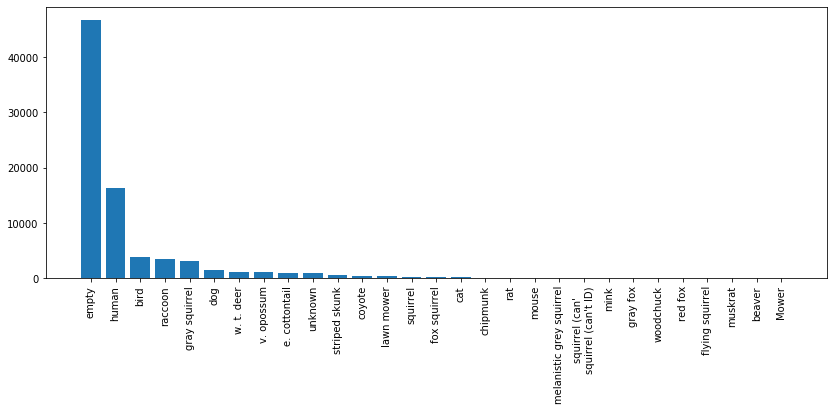

In [3]:
# Plot value counts of unique labels in 2017

plt.figure(figsize=(14,5))
plt.xticks(rotation=90)
plt.bar(df_17.label.value_counts().index, df_17.label.value_counts())

In [4]:
df_14 = pd.read_csv('../data/lpz_2012-2014/lpz_2012-2014/raw/labels.csv')

<BarContainer object of 93 artists>

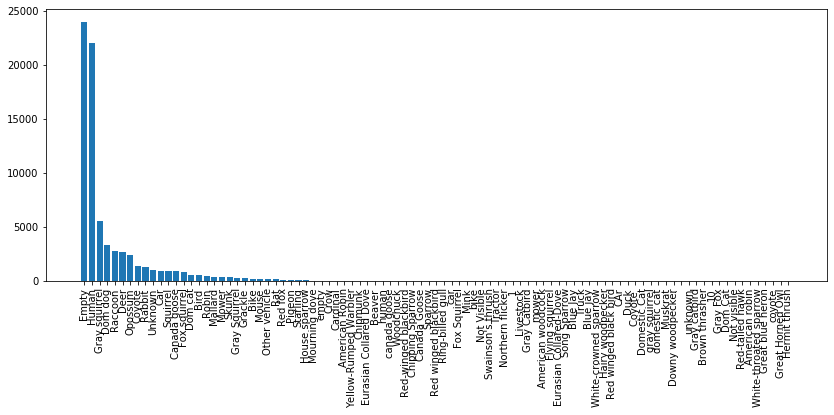

In [5]:
# Plot value counts of unique labels in 2014 df

plt.figure(figsize=(14,5))
plt.xticks(rotation=90)
plt.bar(df_14.Species.value_counts().index, df_14.Species.value_counts())

In [6]:
unique_labels_14 = df_14.Species.apply(lambda x: x.lower()).value_counts().index
unique_labels_17 = df_17.label.value_counts().index

In [7]:
df_14.Species = df_14.Species.apply(lambda x: x.lower())

In [8]:
# Replace bird species with 'bird'

labels_replacement_birds = ['house sparrow', 'eurasian collared-dove', 'crow', 'starling', 
                      'yellow-rumped warbler', 'chipping sparrow', 'great horned owl',
                      'american woodcock', 'northern flicker', 'downy woodpecker',
                      'white-throated sparrow', 'great blue heron', 'grackle',
                      "swainson's thrush", 'gray catbird', 'red-tailed hawk',
                      'cardinal', 'hermit thrush', 'american robin',
                      'red winged blackbird', 'pigeon', 'sparrow', 'ring-billed gull',
                      'mallard', 'mourning dove', 'red-winged blackbird',
                      'eurasian collared dove', 'white-crowned sparrow', 'hairy woodpecker',
                      'red winged black bird', 'blue jay', 'song sparrow', 'robin',
                      'brown thrasher'
                           ]
df_14_clean = df_14.replace(to_replace=labels_replacement_birds, value='bird')

In [9]:
# Replace 2014 labels to match 2017 df where possible
replace_map = {'dom dog': 'dog', 'mower': 'lawn mower', 'skunk': 'striped skunk',
               'coyote ': 'coyote', 'opossum': 'v. opossum', 'deer': 'w. t. deer'}
df_14_clean = df_14_clean.replace(replace_map)

df_14_clean = df_14_clean.replace(to_replace=['domestic cat', 'dom cat'], value='cat')
# df_14 = df_14.replace(to_replace=['dom dog'], value='dog')
# df_14 = df_14.replace(to_replace=['mower'], value='lawn mower')
# df_14 = df_14.replace(to_replace=['skunk'], value='striped skunk')
# df_14 = df_14.replace(to_replace=['coyote '], value='coyote')
# df_14 = df_14.replace(to_replace=['opossum'], value='v. opossum')
# df_14 = df_14.replace(to_replace=['deer'], value='w. t. deer')

In [10]:
# Remove unused labels from df_14

labels_unused = ['bike', 'canada goose', 'not visible', 'duck', '1', 'other vehicle',
                 'car', 'tractor', 'livestock', 'rabbit', 'truck', '`', '10']

df_14_clean = df_14_clean[~df_14_clean['Species'].isin(labels_unused)]

In [11]:
df_14_clean.rename(columns={'Species': 'label'}, inplace=True)
df_14_clean.head(n=2)

,Merge,Survey ID,Date,Time,label,Empty,Human,Vehicle,# Individuals,picturename,concatenate,filename_build,duplicate,original
0,D10-VHC1-WI12_01/24/2012_6:04,D10-VHC1-WI12,1/24/2012,6:04,coyote,0,0,0,1,23,D10-VHC1-WI12 23,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (23).JPG,0,1
1,D10-VHC1-WI12_01/24/2012_6:05,D10-VHC1-WI12,1/24/2012,6:05,coyote,0,0,0,1,24,D10-VHC1-WI12 24,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (24).JPG,0,2


In [12]:
df_14_clean.to_csv('../data/lpz_2012-2014/lpz_2012-2014/raw/labels_clean.csv')

In [27]:
ls ../data/lpz_2012-2014/lpz_2012-2014/raw/SP13/JNT/J01-BBS1-SP13/

J01-BBS1-SP13 (1).JPG     J01-BBS1-SP13 (2340).JPG  J01-BBS1-SP13 (3683).JPG
J01-BBS1-SP13 (10).JPG    J01-BBS1-SP13 (2341).JPG  J01-BBS1-SP13 (3684).JPG
J01-BBS1-SP13 (100).JPG   J01-BBS1-SP13 (2342).JPG  J01-BBS1-SP13 (3685).JPG
J01-BBS1-SP13 (1000).JPG  J01-BBS1-SP13 (2343).JPG  J01-BBS1-SP13 (3686).JPG
J01-BBS1-SP13 (1001).JPG  J01-BBS1-SP13 (2344).JPG  J01-BBS1-SP13 (3687).JPG
J01-BBS1-SP13 (1002).JPG  J01-BBS1-SP13 (2345).JPG  J01-BBS1-SP13 (3688).JPG
J01-BBS1-SP13 (1003).JPG  J01-BBS1-SP13 (2346).JPG  J01-BBS1-SP13 (3689).JPG
J01-BBS1-SP13 (1004).JPG  J01-BBS1-SP13 (2347).JPG  J01-BBS1-SP13 (369).JPG
J01-BBS1-SP13 (1005).JPG  J01-BBS1-SP13 (2348).JPG  J01-BBS1-SP13 (3690).JPG
J01-BBS1-SP13 (1006).JPG  J01-BBS1-SP13 (2349).JPG  J01-BBS1-SP13 (3691).JPG
J01-BBS1-SP13 (1007).JPG  J01-BBS1-SP13 (235).JPG   J01-BBS1-SP13 (3692).JPG
J01-BBS1-SP13 (1008).JPG  J01-BBS1-SP13 (2350).JPG  J01-BBS1-SP13 (3693).JPG
J01-BBS1-SP13 (1009).JPG  J01-BBS1-SP13 (2351).JPG  J01-BBS1-SP13 (3694).JPG


In [24]:
ls ../data/lpz_2016_2017/processed/images | head -10

CHIL - D02-BMT1-JU16_00128.JPG
CHIL - D02-BMT1-JU16_00129.JPG
CHIL - D02-BMT1-JU16_00130.JPG
CHIL - D02-BMT1-JU16_00131.JPG
CHIL - D02-BMT1-JU16_00132.JPG
CHIL - D02-BMT1-JU16_00133.JPG
CHIL - D02-BMT1-JU16_00134.JPG
CHIL - D02-BMT1-JU16_00135.JPG
CHIL - D02-BMT1-JU16_00136.JPG
CHIL - D02-BMT1-JU16_00137.JPG


In [29]:
df_14_clean.head(10)

,Merge,Survey ID,Date,Time,label,Empty,Human,Vehicle,# Individuals,picturename,concatenate,filename_build,duplicate,original
0,D10-VHC1-WI12_01/24/2012_6:04,D10-VHC1-WI12,1/24/2012,6:04,coyote,0,0,0,1,23,D10-VHC1-WI12 23,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (23).JPG,0,1
1,D10-VHC1-WI12_01/24/2012_6:05,D10-VHC1-WI12,1/24/2012,6:05,coyote,0,0,0,1,24,D10-VHC1-WI12 24,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (24).JPG,0,2
2,D10-VHC1-WI12_01/24/2012_6:06,D10-VHC1-WI12,1/24/2012,6:06,coyote,0,0,0,1,25,D10-VHC1-WI12 25,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (25).JPG,0,3
3,D10-VHC1-WI12_01/24/2012_7:06,D10-VHC1-WI12,1/24/2012,7:06,coyote,0,0,0,1,26,D10-VHC1-WI12 26,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (26).JPG,0,4
6,D10-VHC1-WI12_01/26/2012_4:51,D10-VHC1-WI12,1/26/2012,4:51,empty,1,0,0,0,29,D10-VHC1-WI12 29,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (29).JPG,0,7
8,D10-VHC1-WI12_01/28/2012_2:40,D10-VHC1-WI12,1/28/2012,2:40,coyote,0,0,0,1,31,D10-VHC1-WI12 31,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (31).JPG,0,9
9,D10-VHC1-WI12_01/28/2012_2:40,D10-VHC1-WI12,1/28/2012,2:40,coyote,0,0,0,1,32,D10-VHC1-WI12 32,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (32).JPG,0,11
10,D10-VHC1-WI12_01/28/2012_2:42,D10-VHC1-WI12,1/28/2012,2:42,coyote,0,0,0,1,33,D10-VHC1-WI12 33,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (33).JPG,0,13
11,D10-VHC1-WI12_01/30/2012_0:41,D10-VHC1-WI12,1/30/2012,0:41,empty,1,0,0,0,34,D10-VHC1-WI12 34,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (34).JPG,0,14
12,D10-VHC1-WI12_01/30/2012_0:44,D10-VHC1-WI12,1/30/2012,0:44,empty,1,0,0,0,35,D10-VHC1-WI12 35,WI12/DPT/D10-VHC1-WI12/D10-VHC1-WI12 (35).JPG,0,15


In [34]:
df_14_clean[df_14_clean["concatenate"] == 'D10-MAC1-SP13 1979']

,Merge,Survey ID,Date,Time,label,Empty,Human,Vehicle,# Individuals,picturename,concatenate,filename_build,duplicate,original
